# Task 2

Smoluchowski equations:

$$
\frac{d n_1}{d t} = -n_1 \sum_{j \ge 1} n_j + n_1 \sum_{j \ge 2} \lambda j n_j + \frac{1}{2} \sum_{i, j \ge 2} \lambda (i + j) n_i n_j
$$

$$
\frac{d n_k}{d t} = \frac{1}{2} \sum_{i + j = k} n_i n_j - \sum_{i \ge 1} (1 + \lambda) n_i n_k, \quad k \ge 2
$$

Steady state:

$$
\frac{d n_k}{d t} = 0 \Rightarrow \frac{1}{2} \sum_{i + j = k} n_i n_j - \sum_{i \ge 1} (1 + \lambda) n_i n_k = 0
$$

$$
\frac{1}{2} \sum_{k \ge 2} \sum_{i + j = k} z^k n_i n_j - (1 + \lambda) \sum_{i \ge 1} n_i \sum_{k \ge 2} n_k z^k = 0
$$

Applying: $G(z) = \sum_{k \ge 1} n_k z^k$ and $N = \sum_{i \ge 1} n_i$:

$$
\frac{1}{2} \sum_{k \ge 2} \sum_{i + j = k} z^k n_i n_j = \frac{1}{2} \sum_{k \ge 2} \sum_{i, j \ge 1} z^k n_i n_j \delta_{i + j, k} = \frac{1}{2} \sum_{i, j \ge 1} n_i n_j \sum_{k \ge 2} z^k \delta_{i + j, k} = \frac{1}{2} \sum_{i, j \ge 1} z^{i + j} n_i n_j = \frac{1}{2} G^2
$$

$$
\frac{1}{2} G^2 - (1 + \lambda) N G + (1 + \lambda) N n_1 z = 0
$$

$$
G = (1 + \lambda) N \pm (1 + \lambda) N \left(1 - \frac{2 n_1 z}{(1 + \lambda) N}\right)^{1 / 2} = (1 + \lambda) N \left(1 \pm \left(1 - \frac{2 n_1 z}{(1 + \lambda) N}\right)^{1 / 2}\right)
$$

Using the relation:

$$
(1 - z)^{1 / 2} = 1 - \sum_k \frac{z^k}{2 \sqrt{\pi}} \frac{\Gamma(k - 1 / 2)}{\Gamma(k + 1)}
$$

and:

$$
n_1 = \frac{\lambda}{1 + \lambda}
$$

$$
G = (1 + \lambda) N \left(1 \pm \left(1 - \frac{1}{2 \sqrt{\pi}} \sum_k \left(\frac{2 \lambda z}{(1 + \lambda)^2 N}\right)^k \frac{\Gamma(k - 1 / 2)}{\Gamma(k + 1)}\right)\right)
$$

$G$ has to be increasing:

$$
G = \frac{(1 + \lambda) N}{2 \sqrt{\pi}} \sum_k \left(\frac{2 \lambda z}{(1 + \lambda)^2 N}\right)^k \frac{\Gamma(k - 1 / 2)}{\Gamma(k + 1)}
$$

Now we find $N$ (using $G(1) = N$):

$$
\frac{1}{2} N^2 - (1 + \lambda) N^2 + \lambda N = 0
$$

$$
N = \frac{2 \lambda}{2 \lambda + 1}
$$

$$
G = \frac{\lambda (1 + \lambda)}{\sqrt{\pi} (1 + 2 \lambda)} \sum_k \left(\frac{(1 + 2 \lambda) z}{(1 + \lambda)^2}\right)^k \frac{\Gamma(k - 1 / 2)}{\Gamma(k + 1)}
$$

$$
n_k = \frac{\lambda (1 + \lambda)}{\sqrt{\pi} (1 + 2 \lambda)} \left(\frac{(1 + 2 \lambda)}{(1 + \lambda)^2}\right)^k \frac{\Gamma(k - 1 / 2)}{\Gamma(k + 1)}
$$

In [12]:
import numpy as np
import scipy.signal as spsg
import matplotlib.pyplot as plt
from tqdm import trange
import math

In [9]:
def solve(N0, T, dt, L):
    n = np.zeros(N0)
    n[0] = 1.
    n1 = np.zeros(N0)
    m = np.arange(1, N0 + 1)
    
    for t in trange(T):
        N = n.sum()
        M = (m[1:] * n[1:]).sum()
        n1[0] = n[0] + dt * (-n[0] * N + L * n[0] * M + L * M * (N - n[0]))
        
        k = spsg.fftconvolve(n, n)
        n1[1:] = n[1:] + dt * (.5 * k[:n.shape[0]-1] - (1. + L) * N * n[1:])
        n = n1
    
    return n

In [11]:
def analytic(s, L):
    k = np.arange(1, s + 1)
    n = L * (L + 1.) / (2. * L + 1.) / np.sqrt(np.pi) *\
        ((1. + 2. * L) / (1. + L)**2)**k * k**(-3. / 2.)
    return n

In [41]:
N0 = 100
L = .3
dt = .01
T = math.floor(50 / L / dt)

In [42]:
n = solve(N0, T, dt, L)

100%|██████████| 16666/16666 [00:01<00:00, 11522.25it/s]


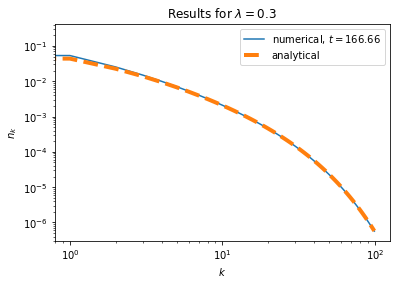

In [43]:
plt.loglog(n, label=f'numerical, $t={dt*T}$')
plt.loglog(analytic(N0, L), '--', lw=4, label='analytical')
plt.xlabel('$k$')
plt.ylabel('$n_k$')
plt.title(f'Results for $\lambda = {L}$')
plt.legend();

In [44]:
N0 = 1000
L = .1
dt = .01
T = math.floor(50 / L / dt)

In [45]:
n = solve(N0, T, dt, L)

100%|██████████| 50000/50000 [00:06<00:00, 7819.61it/s]


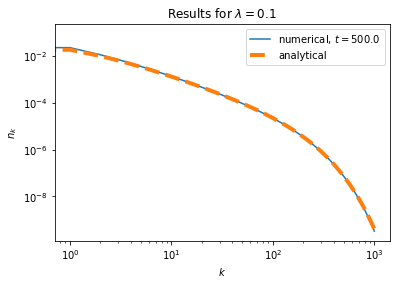

In [46]:
plt.loglog(n, label=f'numerical, $t={dt*T}$')
plt.loglog(analytic(N0, L), '--', lw=4, label='analytical')
plt.xlabel('$k$')
plt.ylabel('$n_k$')
plt.title(f'Results for $\lambda = {L}$')
plt.legend();

# Task 3

In [62]:
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm import trange

In [63]:
N0 = 10**5
nruns = 10
Nmax = 2000

In [70]:
def update(s, i, j, r, L):
    if r > L / (L + 1):
        s = np.append(s, s[i] + s[j])
        s = np.delete(s, [i, j])
    else:
        s = np.append(s, np.ones(int(s[i] + s[j])))
        s = np.delete(s, [i, j])
    
    return s

In [65]:
def density(s):
    return s.shape[0] / N0

In [66]:
def find_n(s):
    N = int(np.max(s))
    n = np.zeros(N + 1)
    for k in range(1, N):
        n[k] = sum(s == k)
    return n

In [77]:
def ac_method(nruns, T, L):
    n_avg = np.zeros(Nmax)
    for nrun in trange(nruns):
        print(f'simulation # {nrun}')
        
        k = 0
        t = 0.
        N = N0
        s = np.ones(N)
        
        while t <= T:
            N = s.shape[0]
            r = np.random.uniform(0, 1)
            i = np.random.randint(1, N)
            j = np.random.randint(1, N)
            
            while i == j:
                j = np.random.randint(1, N)
            s = update(s, i, j, r, L)
            
            tau = 2 / N / (N - 1) * N0
            t += tau
            k += 1
            
            if k % 10**5 == 0:
                print(f'{t} {density(s)} {2 * L / (1. + 2 * L - math.exp(-L * t))}')
                d = density(s)
            
        n = find_n(s)
        if n.shape[0] < Nmax:
            n = np.append(n, np.zeros(Nmax - n.shape[0]))
        
        n_avg += n
    
    n_avg /= nruns
    return n_avg

In [78]:
def analytic(N, L):
    k = np.arange(1, N + 1)
    n = L * (L + 1.) / (2. * L + 1.) / np.sqrt(np.pi) *\
        ((1. + 2. * L) / (1. + L)**2)**k * k**(-3. / 2.)
    return n

In [79]:
tmax = 50.
L = .3
n_avg = ac_method(nruns, tmax, L)

  0%|          | 0/10 [00:00<?, ?it/s]

simulation # 0
4.85525451493386 0.46806 0.4389278471091176
16.882029702613657 0.38377 0.3764862691247929
30.824365996382742 0.37291 0.37502258821048484
45.37073490853792 0.37847 0.3750002874972367


 10%|█         | 1/10 [00:38<05:43, 38.13s/it]

simulation # 1
4.8462046387809545 0.47342 0.43913136699090594
17.04786044031318 0.37873 0.3764138655569247
31.324414375612168 0.37556 0.3750194414076314
45.71966780338559 0.36607 0.375000258923669


 20%|██        | 2/10 [01:20<05:26, 40.82s/it]

simulation # 2
4.837932536396776 0.47318 0.43931804554085996
17.136706788474402 0.38137 0.3763765418075157
31.029288036679116 0.37295 0.37502124131076553
45.2385875384309 0.375 0.3750002991237869


 30%|███       | 3/10 [02:03<04:51, 41.57s/it]

simulation # 3
4.8398977464524515 0.47201 0.439273639819394
16.99954041286113 0.37835 0.37643458921256734
31.344114140586118 0.37289 0.37501932684322864
45.64226479202935 0.37446 0.37500026500646544


 40%|████      | 4/10 [02:45<04:10, 41.71s/it]

simulation # 4
4.872918513145974 0.47186 0.43853273449335406
17.05683417837278 0.381 0.37641005008515
31.36120673749303 0.37398 0.37501922798803533
45.258289173729786 0.38038 0.3750002973610317


 50%|█████     | 5/10 [03:28<03:31, 42.37s/it]

simulation # 5
4.842275315871866 0.47042 0.43921996343136716
16.741305222918857 0.38214 0.37655062379916193
30.81965000141878 0.37333 0.37502262019279753
45.1180144889638 0.38046 0.375000310141745


 60%|██████    | 6/10 [04:11<02:49, 42.35s/it]

simulation # 6
4.864534035802063 0.46933 0.43871993077137367
17.097318985223207 0.38474 0.3763929647534337
31.30642903644111 0.37297 0.37501954659471076
45.834185788994084 0.37097 0.37500025017930605


 70%|███████   | 7/10 [04:52<02:06, 42.04s/it]

simulation # 7
4.856177003745444 0.46837 0.43890714313437956
16.969069909625087 0.38538 0.3764478139921398
30.854238713976525 0.38017 0.37502238667145693
44.97288618153198 0.38019 0.3750003239431262


 80%|████████  | 8/10 [05:36<01:25, 42.71s/it]

simulation # 8
4.8087276211855325 0.47375 0.4399821214478187
17.022676729724832 0.37866 0.37642462865895104
30.874065130462284 0.37828 0.37502225390454874
45.180584312622095 0.37925 0.37500030437438475


 90%|█████████ | 9/10 [06:21<00:43, 43.32s/it]

simulation # 9
4.848411465118148 0.47132 0.43908166998827813
17.0407094239071 0.37973 0.3764169134584816
31.098456878100663 0.37201 0.37502080505718166
45.082561862374085 0.37373 0.3750003134579536


100%|██████████| 10/10 [07:04<00:00, 42.41s/it]


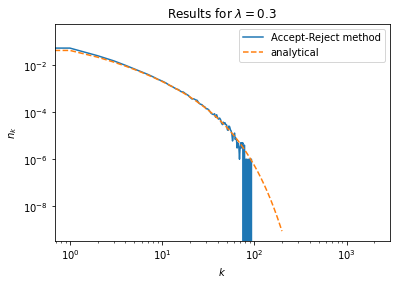

In [80]:
n_ana = analytic(int(Nmax / 10), L)
plt.loglog(n_avg[1:] / N0, label='Accept-Reject method')
plt.loglog(n_ana, '--', label='analytical')
plt.xlabel('$k$')
plt.ylabel('$n_k$')
plt.title(f'Results for $\lambda = {L}$')
plt.legend();

In [81]:
tmax = 50.
L = .1
n_avg = ac_method(nruns, tmax, L)

  0%|          | 0/10 [00:00<?, ?it/s]

simulation # 0
8.831963602512253 0.26861 0.25427798317435274


 10%|█         | 1/10 [00:17<02:39, 17.71s/it]

simulation # 1
8.787121721495998 0.26634 0.25488013410048194


 20%|██        | 2/10 [00:34<02:17, 17.15s/it]

simulation # 2
8.920858444190705 0.26512 0.2531005069796588


 30%|███       | 3/10 [00:52<02:01, 17.35s/it]

simulation # 3
8.942377557698752 0.26634 0.252818667793005


 40%|████      | 4/10 [01:09<01:45, 17.55s/it]

simulation # 4
8.920218519749058 0.26382 0.25310890709177103


 50%|█████     | 5/10 [01:27<01:26, 17.40s/it]

simulation # 5
8.894832032027402 0.26432 0.25344303412967617


 60%|██████    | 6/10 [01:44<01:09, 17.44s/it]

simulation # 6
8.774145707965863 0.27 0.2550554187114673


 70%|███████   | 7/10 [02:02<00:52, 17.46s/it]

simulation # 7
8.858489728359618 0.26609 0.2539243819123856


 80%|████████  | 8/10 [02:18<00:34, 17.18s/it]

simulation # 8
8.997345339488916 0.26388 0.2521043161480861


 90%|█████████ | 9/10 [02:35<00:17, 17.14s/it]

simulation # 9
8.960238415888723 0.26519 0.2525856764013374


100%|██████████| 10/10 [02:53<00:00, 17.33s/it]


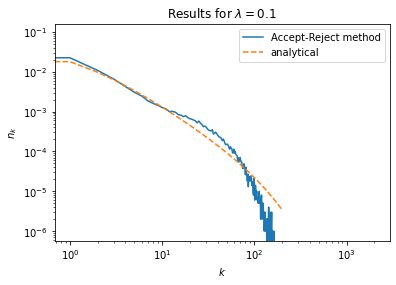

In [82]:
n_ana = analytic(int(Nmax / 10), L)
plt.loglog(n_avg[1:] / N0, label='Accept-Reject method')
plt.loglog(n_ana, '--', label='analytical')
plt.xlabel('$k$')
plt.ylabel('$n_k$')
plt.title(f'Results for $\lambda = {L}$')
plt.legend();